
# CLUSTERING Comparisons
         
Clustering is a type of **Unsupervised Machine Learning**, which can determine relationships of unlabeled data. 

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise.

This notebook will show one approach to prepare data for exploration of DBScan, Agglomerative and KMeans.  
Based on [How DBSCAN Clustering Works](https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/)

### Data information
Test DBScan over features
-  DBSCAN suffers from the curse of dimensionality.
-  This data has over 60 dimensions, so a few features will be modeled, not all of them at once.
-  Want to avoid false correlation like ice cream sales and drowning deaths, but still visualize groups and noise.

### Dependencies

In [2]:
import pandas as pd
import csv
import os 
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import seaborn as sns

### Preparing Data
Use pandas to prepare data for machine learning.


In [3]:
#Reading in summarized feature set

file_name = os.path.join(os.getcwd(), "summary_out_Text2.csv")

df = pd.read_csv(file_name,skipinitialspace=True)

Look at the structure of the data.

In [4]:
df.head()

,unique_award_id,naics_code,MinTxYear,MaxTxYear,NumTxYear,NumTrx,dollars_obligated,contract_name_ru,level_3_cat_delivery,level_3_cat_securitycompliance,...,va09_qwes,va10_dellm,va11_other,description_of_requirement,psc_desc,AT_A BPA CALL,AT_B IDC,AT_B PURCHASE ORDER,AT_C DELIVERY ORDER,AT_D DEFINITIVE CONTRACT
0,05GA0A17A00190001,541511.0,2017,2017,1,1,91021.20,SCHED70,0,0,...,0,0,1,IGF::OT::IGF HOTELING RESERVATION SYSTEM,D399 IT AND TELECOM- OTHER IT AND TELECOMMUNIC...,1,0,0,0,0
1,05GA0A17A001905GA0A18K0034,541511.0,2018,2019,2,2,72391.24,SCHED70,0,0,...,0,0,2,IGF::OT::IGF HOTELING RESERVATION SYSTEM SERVI...,D399 IT AND TELECOM- OTHER IT AND TELECOMMUNIC...,2,0,0,0,0
2,05GA0A17A001905GA0A19K0079,541511.0,2019,2020,2,2,113308.47,SCHED70,0,0,...,0,0,2,THE PURPOSE OF THIS ACTION IS TO EXERCISE OPTI...,D318 IT AND TELECOM- INTEGRATED HARDWARE/SOFTW...,2,0,0,0,0
3,05GA0A17A002205GA0A17A00220001,334111.0,2017,2017,1,1,31068.00,SCHED70,0,0,...,0,0,1,IGF::OT::IGF,D399 IT AND TELECOM- OTHER IT AND TELECOMMUNIC...,1,0,0,0,0
4,05GA0A17A003005GA0A17A00300001,541519.0,2017,2017,1,1,312000.00,SCHED70,0,0,...,0,0,0,IGF::OT::IGF WIRELESS CELLULAR&DATA SERVICES,D399 IT AND TELECOM- OTHER IT AND TELECOMMUNIC...,1,0,0,0,0


In [5]:
df.columns

Index(['unique_award_id', 'naics_code', 'MinTxYear', 'MaxTxYear', 'NumTxYear',
       'NumTrx', 'dollars_obligated', 'contract_name_ru',
       'level_3_cat_delivery', 'level_3_cat_securitycompliance',
       'level_3_cat_storage', 'level_3_cat_enduser', 'level_3_cat_platform',
       'level_3_cat_application', 'level_3_cat_compute',
       'level_3_cat_itmanagement', 'level_3_cat_network',
       'level_3_cat_datacenter', 'level_2_cat_itprof', 'level_2_cat_products',
       'level_2_cat_caas', 'eighta', 'co_bus_size_sba', 'biz_rule_tiert1',
       'biz_rule_tiert2', 'biz_rule_tierbic', 'biz_rule_tier0', 'award', 'idv',
       'department_name', 'funding_cfo_act_agency', 'funding_dod_or_civilian',
       'vdo1_booz', 'vdo2_none', 'vdo3_dfs', 'vdo4_saic', 'vdo5_cara',
       'vdo6_ipsi', 'vdo7_attc', 'vdo8_acct', 'vdo9_srac', 'vd10_ibm',
       'vd11_other', 'va01_none', 'va02_solv', 'va03_cara', 'va04_attc',
       'va05_cell', 'va06_mcic', 'va07_dlts', 'va08_attm', 'va09_qwes',
      

In [6]:
df.shape

(207714, 61)

Select columns that will be used as features for Machine Learning.

In [10]:
#load two features
x = df[['dollars_obligated','MaxTxYear']]


Dealing with missing values can be done by removing rows with missing data....

In [11]:
#check number of rows
print ("original number of rows:  %d" % (len(x.index)))

#see the nan rows
x[x.isna().any(axis=1)]

#remove rows
x1 = x.dropna()
print ("new number of rows:  %d" % (len(x1.index)))


original number of rows:  207714
new number of rows:  207714


In [12]:
## confirm that there are no null values
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207714 entries, 0 to 207713
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dollars_obligated  207714 non-null  float64
 1   MaxTxYear          207714 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 3.2 MB


To see variance of features: boxplot (from Seaborn) can be used with the MinMaxscaler (from scikit-learn) to visualize this.

<AxesSubplot:>

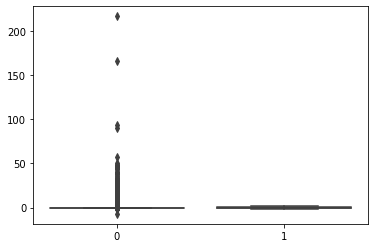

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x1)

fmX = pd.DataFrame(X_scaled)

ax = sns.boxplot(data=fmX)
ax

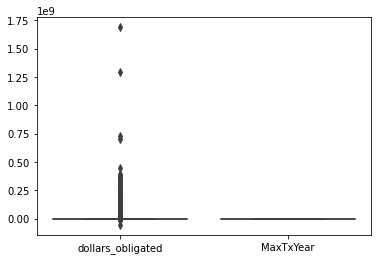

In [14]:
#look at the box plot of the unscaled data
ax = sns.boxplot(data=x1)

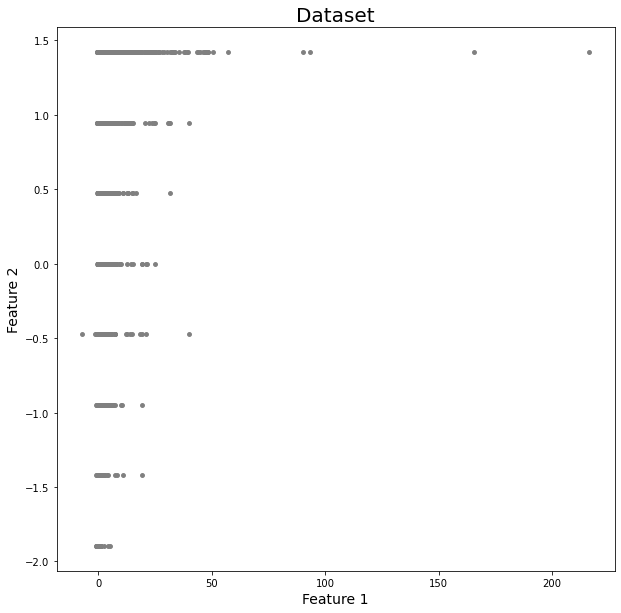

In [15]:
#scatter plot the first 2 columns
plt.figure(figsize=(10,10))
plt.scatter(fmX[0],fmX[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [16]:
#start with KMeans cluster of the 2
k_means=KMeans(n_clusters=4,random_state=42)
k_means.fit(fmX[[0,1]])
fmX['KMeans_labels']=k_means.labels_

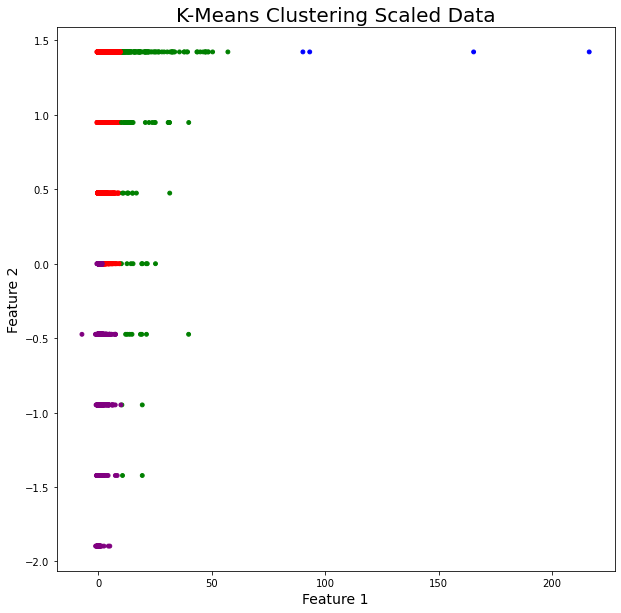

In [17]:
# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(fmX[0],fmX[1],c=fmX['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering Scaled Data',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [18]:
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
df_X_normalized = pd.DataFrame(X_normalized)

In [19]:
#start with KMeans cluster of the 2
k_means_norm=KMeans(n_clusters=4,random_state=42)
k_means_norm.fit(df_X_normalized[[0,1]])
df_X_normalized['KMeans_labels']=k_means_norm.labels_

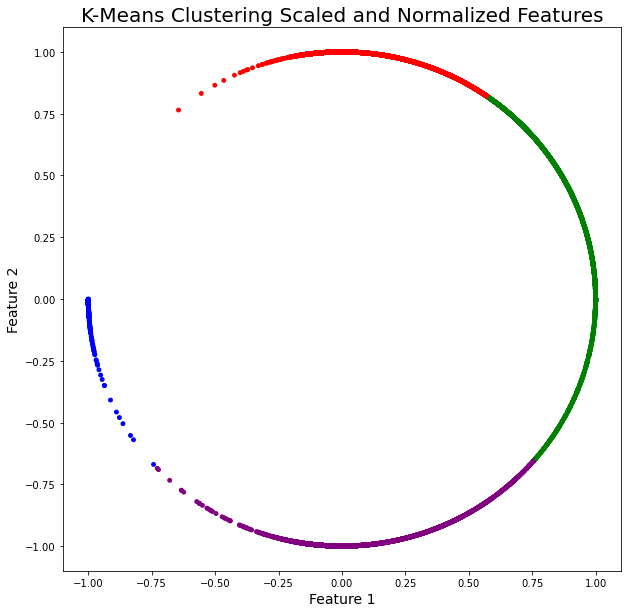

In [20]:
# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(10, 10))
plt.scatter(df_X_normalized[0],df_X_normalized[1],c=df_X_normalized['KMeans_labels']
            ,cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering Scaled and Normalized Features',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()


In [21]:
#picking a subset of data
df_X_normalized.describe()

,0,1,KMeans_labels
count,207714.000000,207714.000000,207714.000000
mean,-0.147199,-0.012909,0.708123
std,0.339389,0.928970,0.747095
min,-1.000000,-1.000000,0.000000
25%,-0.156646,-0.996845,0.000000
50%,-0.077821,-0.004399,1.000000
75%,-0.051637,0.996819,1.000000
max,1.000000,1.000000,3.000000


In [22]:
df_samp = df_X_normalized.sample(frac = 0.10)

In [23]:
df_samp.describe()

,0,1,KMeans_labels
count,20771.000000,20771.000000,20771.000000
mean,-0.147618,-0.009151,0.711184
std,0.340784,0.928460,0.747082
min,-1.000000,-1.000000,0.000000
25%,-0.156562,-0.996847,0.000000
50%,-0.077766,-0.004390,1.000000
75%,-0.051535,0.996814,1.000000
max,1.000000,1.000000,3.000000


In [24]:
df_samp.shape

(20771, 3)

In [25]:
#Look at agglomerative - selected a very small sample since memory error
#running this took 80% of memory -any more pings my pc
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(df_samp[[0,1]])
df_samp['HR_labels']=model.labels_

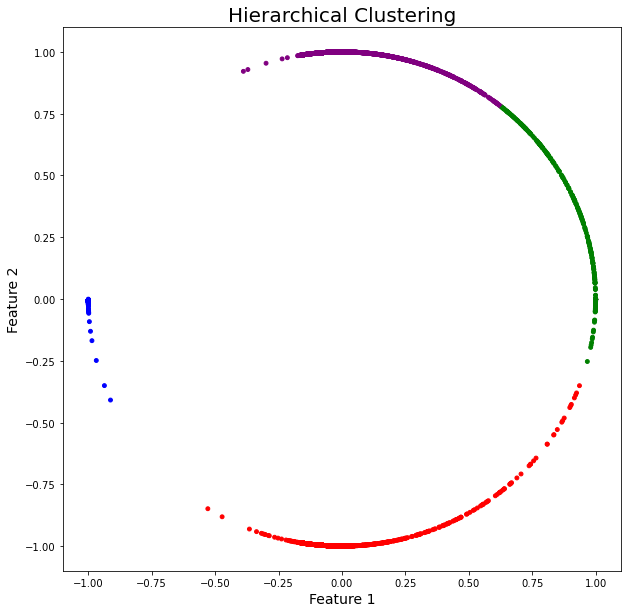

In [26]:
# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df_samp[0],df_samp[1],c=df_samp['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [27]:
#finally DBScan, though both heirarchical and KMeans did pretty well
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df_samp[[0,1]])
df_samp['DBSCAN_labels']=dbscan.labels_

In [28]:
df_samp.shape

(20771, 5)

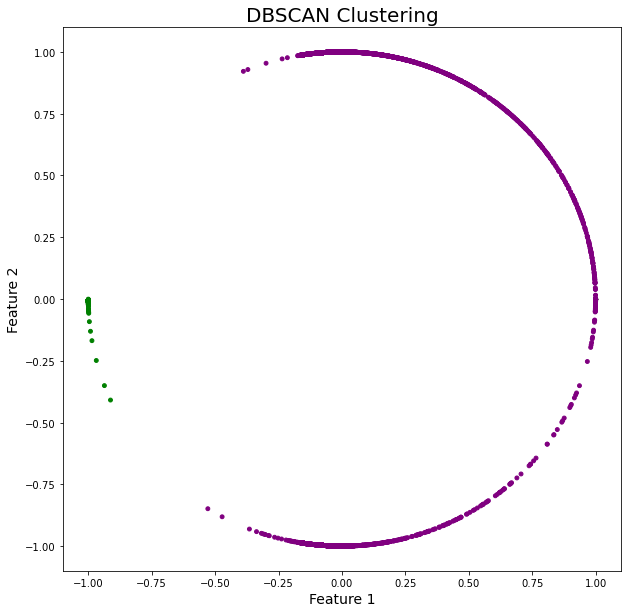

In [29]:
# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df_samp[0],df_samp[1],c=df_samp['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [30]:
#try with other data that has been one hot encoded
df_fs=df[['naics_code','level_3_cat_platform']]

In [31]:
#remove nulls
df_fs1 =df_fs.dropna()

<AxesSubplot:>

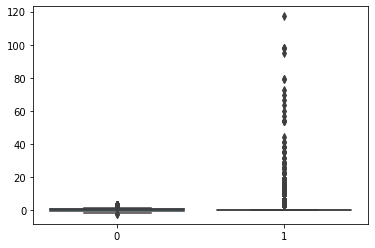

In [32]:
#scale the new data and plot
scaler = StandardScaler()
df_fs_scaled = scaler.fit_transform(df_fs1)

df_scaled = pd.DataFrame(df_fs_scaled)

ax = sns.boxplot(data=df_scaled)
ax

In [33]:
#start with KMeans cluster of the 2
k_means=KMeans(n_clusters=4,random_state=42)
k_means.fit(df_scaled[[0,1]])
df_scaled['KMeans_labels']=k_means.labels_

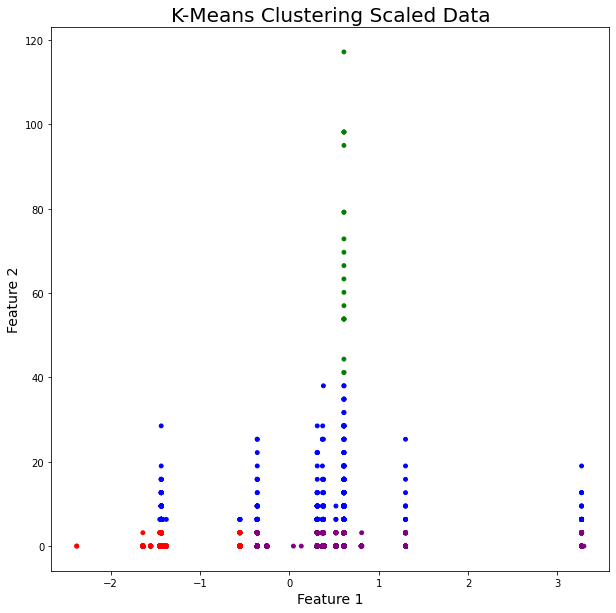

In [34]:
# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df_scaled[0],df_scaled[1],c=df_scaled['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering Scaled Data',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [35]:
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
df_norm = normalize(df_scaled)
  
# Converting the numpy array into a pandas DataFrame
df_norm = pd.DataFrame(df_norm)

In [36]:
#start with KMeans cluster of the 2
k_means_norm=KMeans(n_clusters=4,random_state=42)
k_means_norm.fit(df_norm[[0,1]])
df_norm['KMeans_labels']=k_means_norm.labels_

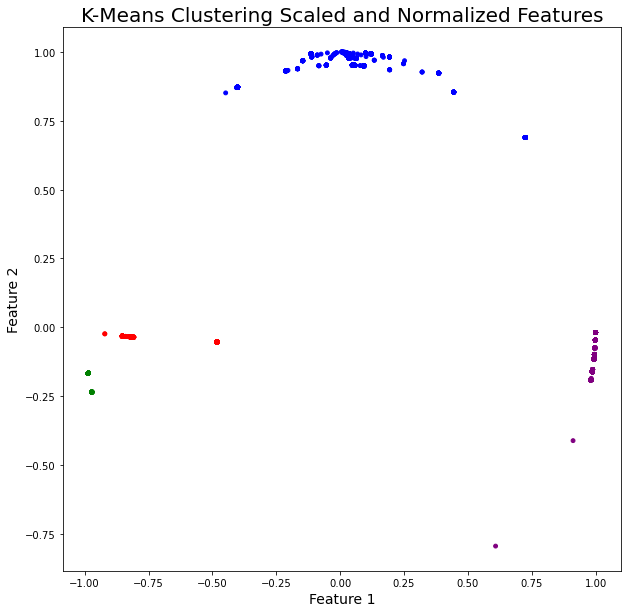

In [37]:
# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(10, 10))
plt.scatter(df_norm[0],df_norm[1],c=df_norm['KMeans_labels']
            ,cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering Scaled and Normalized Features',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [38]:
#try dbscan on these two
df_samp2 = df_norm.sample(frac = 0.05)

In [39]:
print(df_samp2.shape, df.shape)

(10386, 4) (207714, 61)


In [40]:
df_samp2.head()

,0,1,2,KMeans_labels
67853,0.986961,-0.160959,0.000000,0
172299,0.987163,-0.159717,0.000000,0
156539,-0.819618,-0.034567,0.571866,1
4661,-0.819618,-0.034567,0.571866,1
84402,0.995146,-0.098409,0.000000,0


In [41]:
dbscan.fit(df_samp2[[0,1]])
df_samp2['DBSCAN_labels']=dbscan.labels_

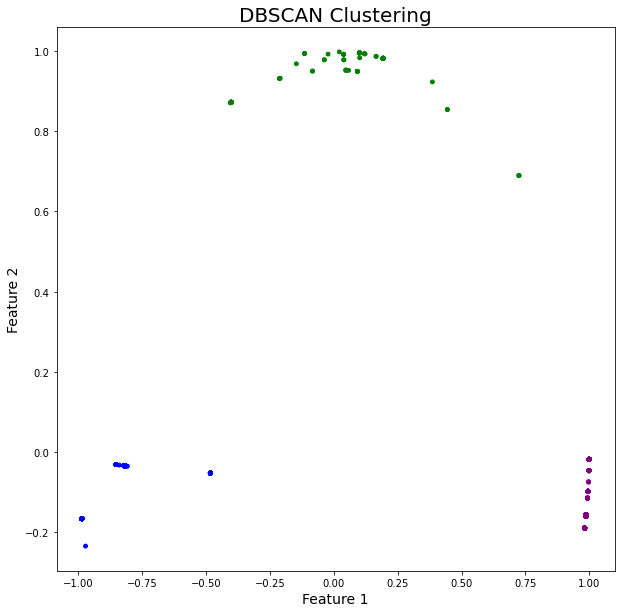

In [42]:
# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df_samp2[0],df_samp2[1],c=df_samp2['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [43]:
#conclusion DBScan works much better on the summarized data than the unsummarized